# import stuff

In [1]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import glob
import netCDF4
import pandas
import wrf
import string
import seaborn
import matplotlib.colors
import cmocean

import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

# open control data

In [2]:
ens = '001'

doing half at a time

In [5]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/nested_FMAASO_10days/400/'+ens+'/extracted_variables'
file_list = sorted(glob.glob(root_dir+'/'+'wrfout_d03_1979-01-0[1,2,3,4,5]*'))
ds_list_cont = [netCDF4.Dataset(file) for file in file_list]
cont_mfds = xarray.open_mfdataset(root_dir+'/'+'wrfout_d03_1979-01-0[1,2,3,4,5]*', concat_dim='Time')
#cont_mfds = xarray.open_mfdataset(root_dir + 'wrfout_d03_1979-01-0[2,3,4,5,6,7,8,9]*')

In [8]:
cont_mfds['RAINNC'].shape

(120, 800, 2000)

In [5]:
ptot_400 = wrf.getvar(ds_list_cont, 'pressure', timeidx=wrf.ALL_TIMES)
numpy.save('DATA_ptot_400_2km_1of2.npy', ptot_400)

In [ ]:
tk_400 = wrf.getvar(ds_list_cont, 'tk', timeidx=wrf.ALL_TIMES)
numpy.save('DATA_tk_400_2km_1of2.npy', tk_400)

In [4]:
ptot_400 = numpy.load('DATA_ptot_400_2km.npy')
tk_400 = numpy.load('DATA_tk_400_2km.npy')
# ua_400 = numpy.load('DATA_ua_400_2km.npy')
# wa_400 = numpy.load('DATA_wa_400_2km.npy')
# geopot_400 = numpy.load('DATA_geopot_400_2km.npy')

In [5]:
#rainc_400 = cont_mfds['RAINC']
#rainnc_400 = cont_mfds['RAINNC']
qvapor_400 = cont_mfds['QVAPOR']
#w_400 = cont_mfds['W']
#u_400 = cont_mfds['U']
pblh_400 = cont_mfds['PBLH']
#phb_400 = cont_mfds['PHB']
#qcloud_400 = cont_mfds['QCLOUD']
cldfra_400 = cont_mfds['CLDFRA']

In [6]:
time = cont_mfds['Times'].values
xlat = cont_mfds['XLAT'].sel(Time=0).values
xlong = cont_mfds['XLONG'].sel(Time=0).values
landmask = cont_mfds['LANDMASK'].sel(Time=0).values

# open phys data

In [2]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/nested_FMAASO_10days/1000/'+ens+'/extracted_variables'
file_list = sorted(glob.glob(root_dir+'/'+'wrfout_d03_1979-01*'))
ds_list_phys = [netCDF4.Dataset(file) for file in file_list]
phys_mfds = xarray.open_mfdataset(root_dir + 'wrfout_d03_1979-01*')

NameError: name 'ens' is not defined

In [8]:
#ptot_1000 = numpy.load('DATA_ptot_1000.npy')
#ua_1000 = numpy.load('DATA_ua_1000.npy')
#wa_1000 = numpy.load('DATA_wa_1000.npy')
tk_1000 = numpy.load('DATA_tk_1000_2km.npy')

In [9]:
rainc_1000 = phys_mfds['RAINC']
rainnc_1000 = phys_mfds['RAINNC']
qvapor_1000 = phys_mfds['QVAPOR']
#w_1000 = phys_mfds['W']
#u_1000 = phys_mfds['U']
pblh_1000 = phys_mfds['PBLH']
#phb_1000 = phys_mfds['PHB']
#qcloud_1000 = phys_mfds['QCLOUD']
cldfra_1000 = phys_mfds['CLDFRA']

# get time data

In [10]:
time_datetimes = pandas.to_datetime([i.decode('utf-8') for i in time], format = '%Y-%m-%d_%H:%M:%S')
time_datetimes_shifted = time_datetimes + datetime.timedelta(hours=-4)

In [11]:
g = 9.81

# get latlon subset

In [12]:
lat_hi = 10
lat_lo = -10
latlon_indices = (xlat<=lat_hi)&(xlat>=lat_lo)&(landmask==1)

# PBLH diffs

In [13]:
pblh_diffs = pblh_1000.values-pblh_400.values

In [14]:
pblh_diffs_latlon_nan = numpy.copy(pblh_diffs)
pblh_diffs_latlon_nan[:,~latlon_indices]=numpy.nan

# qvapor

In [15]:
qvapor_diffs = qvapor_1000.values-qvapor_400.values

In [16]:
qvapor_diffs_latlon_nan = numpy.copy(qvapor_diffs)
qvapor_diffs_latlon_nan[:,:,~latlon_indices]=numpy.nan

In [17]:
qvapor_diffs_latmean = numpy.nanmean(qvapor_diffs_latlon_nan, axis=2)

# cldfra

In [18]:
cldfra_diffs = cldfra_1000.values-cldfra_400.values

In [19]:
cldfra_diffs_latlon_nan = numpy.copy(cldfra_diffs)
cldfra_diffs_latlon_nan[:,:,~latlon_indices]=numpy.nan

In [20]:
cldfra_diffs_latmean = numpy.nanmean(cldfra_diffs_latlon_nan, axis=2)

# wa and ua diffs

# tk

In [21]:
tk_diffs = tk_1000 - tk_400

In [22]:
tk_diffs_latlon_nan = numpy.copy(tk_diffs)
tk_diffs_latlon_nan[:,:,~latlon_indices]=numpy.nan

In [23]:
tk_diffs_latmean = numpy.nanmean(tk_diffs_latlon_nan, axis=2)

# ptot

In [24]:
ptot_400_latlon_nan = numpy.copy(ptot_400)
ptot_400_latlon_nan[:,:,~latlon_indices]=numpy.nan

In [25]:
ptot_400_latmean = numpy.nanmean(ptot_400_latlon_nan, axis=2)

# geopotential

# pblh

In [27]:
pblh_diffs_latlon_nan = numpy.copy(pblh_diffs)
pblh_diffs_latlon_nan[:,~latlon_indices]=numpy.nan

In [28]:
pblh_400_latlon_nan = numpy.copy(pblh_400)
pblh_400_latlon_nan[:,~latlon_indices]=numpy.nan

In [29]:
pblh_1000_latlon_nan = numpy.copy(pblh_1000)
pblh_1000_latlon_nan[:,~latlon_indices]=numpy.nan

Set lontidues west of 290º equal to NaN so that Andes don't have a weird boundary layer

In [31]:
lon_lo = 290-360
lon_hi = 320-360
lon_indices = (xlong[0,:]<lon_lo)|(xlong[0,:]>lon_hi)

In [32]:
pblh_400_latlon_nan[:,:,lon_indices]=numpy.nan
pblh_1000_latlon_nan[:,:,lon_indices]=numpy.nan

In [33]:
pblh_diffs_latmean = numpy.nanmean(pblh_diffs_latlon_nan, axis=1)
pblh_400_latmean = numpy.nanmean(pblh_400_latlon_nan, axis=1)
pblh_1000_latmean = numpy.nanmean(pblh_1000_latlon_nan, axis=1)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


plot qvapor and wind climatologies

In [34]:
# make color map
minval=0. # for inferno:  0.18
maxval=0.95 # for inferno: 1.0
n=256
full_cmap = mp.get_cmap('YlGnBu')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list(\
    'trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval),\
    full_cmap(numpy.linspace(minval, maxval, n)))

In [35]:
colors1 = cmocean.cm.turbid_r(np.linspace(0., 1, 128))
colors2 = cmocean.cm.deep(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = numpy.vstack((colors1, colors2))
cmap_precip = matplotlib.colors.LinearSegmentedColormap.from_list('my_colormap', colors)

## plot qvapor, cldfra, and tk differences at 15:00

In [36]:
time_indices_1500 = [(t.hour in [15]) and (t.day in range(2,11)) for t in time_datetimes_shifted]
time_indices_1400 = [(t.hour in [14]) and (t.day in range(2,11)) for t in time_datetimes_shifted]

In [41]:
time_indices_1400.__len__()

24

In [43]:
tk_diffs_latmean.shape

(26, 29, 2000)

In [37]:
qvapor_diffs_latmean_timechunk = numpy.nanmean(qvapor_diffs_latmean[time_indices_1500,:,:], axis=0)
cldfra_diffs_latmean_timechunk = numpy.nanmean(cldfra_diffs_latmean[time_indices_1500,:,:], axis=0)
tk_diffs_latmean_timechunk = numpy.nanmean(tk_diffs_latmean[time_indices_1500,:,:], axis=0)
#ua_diffs_latmean_timechunk = numpy.nanmean(ua_diffs_latmean[time_indices_1500,:,:], axis=0)
#wa_diffs_latmean_timechunk = numpy.nanmean(wa_diffs_latmean[time_indices_1500,:,:], axis=0)


pblh_400_latmean_timechunk = numpy.nanmean(pblh_400_latmean[time_indices_1400,:], axis=0)
pblh_1000_latmean_timechunk = numpy.nanmean(pblh_1000_latmean[time_indices_1400,:], axis=0)

geopot_400_latmean_timechunk = numpy.nanmean(geopot_400_latmean[time_indices_1500,:,:], axis=0)
ptot_400_latmean_timechunk = numpy.nanmean(ptot_400_latmean[time_indices_1500,:,:], axis=0)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


IndexError: boolean index did not match indexed array along dimension 0; dimension is 26 but corresponding boolean dimension is 24

# create mesh

In [51]:
xx,zz=numpy.meshgrid(xlong[0,:],geopot_400_latmean_timechunk[:,:].mean(axis=1)/(1000*g))

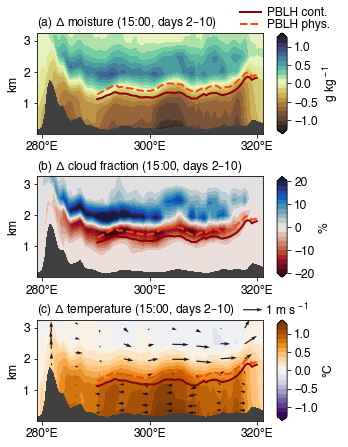

In [52]:
fontsize = 12

fig = mp.figure(figsize=(4,6))

#axes[0].contourf(qvapor_diffs_latmean_timechunk)
#axes[1].contourf(cldfra_diffs_latmean_timechunk)
#axes[2].contourf(tk_diffs_latmean_timechunk)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

ax_list = []
contour_list = []



ax = fig.add_subplot(311)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-1.25,1.251,0.125)
contour_plot = ax.contourf(xx+360.,\
                           geopot_400_latmean_timechunk/(g*1000.),\
                           qvapor_diffs_latmean_timechunk*1000.,\
                           levels=levels,\
                           cmap=cmap_precip,\
                           extend='both')
ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_xlim(279,321)
ax.set_ylim(0,3.25)
ax.set_yticks([1,2,3])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)




ax = fig.add_subplot(312)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-20,20.1,2)
contour_plot = ax.contourf(xx+360.,\
                           geopot_400_latmean_timechunk/(g*1000.),\
                           cldfra_diffs_latmean_timechunk*100.,\
                           levels=levels,\
                           cmap=cmocean.cm.balance_r,\
                           extend='both')
ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,3.25)
ax.set_xlim(279,321)
ax.set_yticks([1,2,3])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)








every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .3 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .2#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

ax = fig.add_subplot(313)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-1.25,1.251,0.125)
contour_plot = ax.contourf(xx+360.,\
                           geopot_400_latmean_timechunk/(g*1000.),\
                           tk_diffs_latmean_timechunk,\
                           levels=levels,\
                           cmap='PuOr_r',\
                           extend='both')
ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,3.25)
ax.set_xlim(279,321)
ax.set_yticks([1,2,3])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)


quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_latmean_timechunk[z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_latmean_timechunk[z_indices,::every_nth_lon],\
          wa_diffs_latmean_timechunk[z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width)#, headwidth=quiver_head_width,\
          #headlength=quiver_head_length)

fig.tight_layout(h_pad=2)



handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(0.9,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower left', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

ax_list[0].text(s='(a) $\Delta$ moisture (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[0].transAxes)
ax_list[1].text(s='(b) $\Delta$ cloud fraction (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[1].transAxes)
ax_list[2].text(s='(c) $\Delta$ temperature (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[2].transAxes)

axpos1 = ax_list[0].get_position()
axpos2 = ax_list[1].get_position()
axpos3 = ax_list[2].get_position()

cbar_ax1 = fig.add_axes([axpos1.x1+0.05,axpos1.y0,0.035,axpos1.height])
cbar_ax2 = fig.add_axes([axpos2.x1+0.05,axpos2.y0,0.035,axpos2.height])
cbar_ax3 = fig.add_axes([axpos3.x1+0.05,axpos3.y0,0.035,axpos3.height])

cbar1 = fig.colorbar(contour_list[0], cax=cbar_ax1)
cbar_ax1.tick_params(labelsize=fontsize)
cbar1.set_ticks([-1,-.5,0,.5,1])
cbar1.set_label('g kg$^{\,-1}$', fontsize=fontsize)

cbar2 = fig.colorbar(contour_list[1], cax=cbar_ax2)
cbar_ax2.tick_params(labelsize=fontsize)
cbar2.set_ticks([-20,-10,0,10,20])
cbar2.set_label('%', fontsize=fontsize)

cbar3 = fig.colorbar(contour_list[2], cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_ticks([-1.5,-1,-.5,0,.5,1,1.5])
cbar3.set_label('$\degree$C', fontsize=fontsize)


quiver_key = ax_list[2].quiverkey(quiver_plot, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[2].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=1.01, y=1.02,\
                                  ha='left', va='bottom',\
                                  transform=ax_list[2].transAxes, \
                                  fontsize=fontsize)


fig.savefig('png_files/moisture_clouds_temp_1500_pblh_1400_days2-10_zcoords.png', dpi=600, bbox_inches='tight')

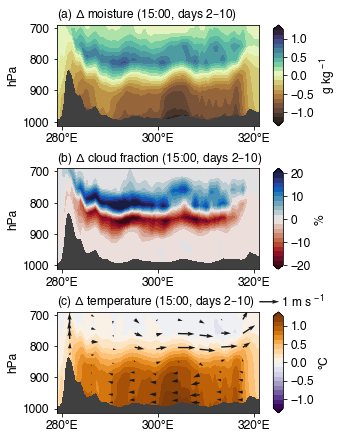

In [54]:
fontsize = 12

fig = mp.figure(figsize=(4,6))

#axes[0].contourf(qvapor_diffs_latmean_timechunk)
#axes[1].contourf(cldfra_diffs_latmean_timechunk)
#axes[2].contourf(tk_diffs_latmean_timechunk)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

ax_list = []
contour_list = []



ax = fig.add_subplot(311)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-1.25,1.251,0.125)
contour_plot = ax.contourf(xx+360.,\
                           ptot_400_latmean_timechunk/(100.),\
                           qvapor_diffs_latmean_timechunk*1000.,\
                           levels=levels,\
                           cmap=cmap_precip,\
                           extend='both')
#ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
#ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_xlim(279,321)
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)




ax = fig.add_subplot(312)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-20,20.1,2)
contour_plot = ax.contourf(xx+360.,\
                           ptot_400_latmean_timechunk/(100.),\
                           cldfra_diffs_latmean_timechunk*100.,\
                           levels=levels,\
                           cmap=cmocean.cm.balance_r,\
                           extend='both')
#ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
#ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_xlim(279,321)
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)








every_nth_lon=10
every_nth_z=1
#z_indices=[i for i in range(ptot_400_latmean_timechunk.shape[0])]
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .035
quiver_shaft_width = 2#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

ax = fig.add_subplot(313)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-1.25,1.251,0.125)
contour_plot = ax.contourf(xx+360.,\
                           ptot_400_latmean_timechunk/100.,\
                           tk_diffs_latmean_timechunk,\
                           levels=levels,\
                           cmap='PuOr_r',\
                           extend='both')
#ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
#ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_xlim(279,321)
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)

quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          ptot_400_latmean_timechunk[z_indices,::every_nth_lon]/100.,\
          ua_diffs_latmean_timechunk[z_indices,::every_nth_lon],\
          wa_diffs_latmean_timechunk[z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width)

fig.tight_layout(h_pad=2)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(0.9,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower left', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)


ax_list[0].set_ylim(1013.25,690)
ax_list[1].set_ylim(1013.25,690)
ax_list[2].set_ylim(1013.25,690)

ax_list[0].text(s='(a) $\Delta$ moisture (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[0].transAxes)
ax_list[1].text(s='(b) $\Delta$ cloud fraction (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[1].transAxes)
ax_list[2].text(s='(c) $\Delta$ temperature (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[2].transAxes)

axpos1 = ax_list[0].get_position()
axpos2 = ax_list[1].get_position()
axpos3 = ax_list[2].get_position()

cbar_ax1 = fig.add_axes([axpos1.x1+0.05,axpos1.y0,0.035,axpos1.height])
cbar_ax2 = fig.add_axes([axpos2.x1+0.05,axpos2.y0,0.035,axpos2.height])
cbar_ax3 = fig.add_axes([axpos3.x1+0.05,axpos3.y0,0.035,axpos3.height])

cbar1 = fig.colorbar(contour_list[0], cax=cbar_ax1)
cbar_ax1.tick_params(labelsize=fontsize)
cbar1.set_ticks([-1,-.5,0,.5,1])
cbar1.set_label('g kg$^{\,-1}$', fontsize=fontsize)

cbar2 = fig.colorbar(contour_list[1], cax=cbar_ax2)
cbar_ax2.tick_params(labelsize=fontsize)
cbar2.set_ticks([-20,-10,0,10,20])
cbar2.set_label('%', fontsize=fontsize)

cbar3 = fig.colorbar(contour_list[2], cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_ticks([-1.5,-1,-.5,0,.5,1,1.5])
cbar3.set_label('$\degree$C', fontsize=fontsize)


quiver_key = ax_list[2].quiverkey(quiver_plot, \
                                  coordinates='axes', \
                                  X=1.1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[2].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=1.11, y=1.02,\
                                  ha='left', va='bottom',\
                                  transform=ax_list[2].transAxes, \
                                  fontsize=fontsize)


fig.savefig('png_files/moisture_clouds_temp_1500_pblh_1400_days2-10_pcoords.png', dpi=600, bbox_inches='tight')



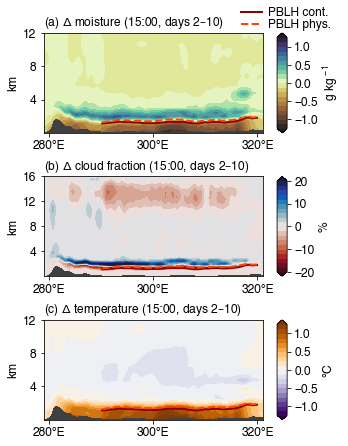

In [58]:
fontsize = 12

fig = mp.figure(figsize=(4,6))

#axes[0].contourf(qvapor_diffs_latmean_timechunk)
#axes[1].contourf(cldfra_diffs_latmean_timechunk)
#axes[2].contourf(tk_diffs_latmean_timechunk)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

ax_list = []
contour_list = []



ax = fig.add_subplot(311)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-1.25,1.251,0.125)
contour_plot = ax.contourf(xx+360.,\
                           geopot_400_latmean_timechunk/(g*1000.),\
                           qvapor_diffs_latmean_timechunk*1000.,\
                           levels=levels,\
                           cmap=cmap_precip,\
                           extend='both')
ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_xlim(279,321)
ax.set_ylim(0,12)
ax.set_yticks([4,8,12])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)




ax = fig.add_subplot(312)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-20,20.1,2)
contour_plot = ax.contourf(xx+360.,\
                           geopot_400_latmean_timechunk/(g*1000.),\
                           cldfra_diffs_latmean_timechunk*100.,\
                           levels=levels,\
                           cmap=cmocean.cm.balance_r,\
                           extend='both')
ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,16)
ax.set_xlim(279,321)
ax.set_yticks([4,8,12,16])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)








# every_nth_lon=10
# every_nth_z=1
# z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
# quiver_scale = .3 # 0.05 for 850-600, 0.1 for below 850
# quiver_shaft_width = .2#.75
# quiver_key_scale = 1
# quiver_color = '0.1'
# quiver_head_width = quiver_shaft_width*15
# quiver_head_length = quiver_shaft_width*15

ax = fig.add_subplot(313)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-1.25,1.251,0.125)
contour_plot = ax.contourf(xx+360.,\
                           geopot_400_latmean_timechunk/(g*1000.),\
                           tk_diffs_latmean_timechunk,\
                           levels=levels,\
                           cmap='PuOr_r',\
                           extend='both')
ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,12)
ax.set_xlim(279,321)
ax.set_yticks([4,8,12])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)


# quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
#           geopot_400_latmean_timechunk[z_indices,::every_nth_lon]/(g*1000.),\
#           ua_diffs_latmean_timechunk[z_indices,::every_nth_lon],\
#           wa_diffs_latmean_timechunk[z_indices,::every_nth_lon]*100.,\
#           units='xy', scale=quiver_scale, \
#           color=quiver_color, zorder=3, \
#           width=quiver_shaft_width)#, headwidth=quiver_head_width,\
#           #headlength=quiver_head_length)

fig.tight_layout(h_pad=2)



handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(0.9,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower left', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

ax_list[0].text(s='(a) $\Delta$ moisture (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[0].transAxes)
ax_list[1].text(s='(b) $\Delta$ cloud fraction (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[1].transAxes)
ax_list[2].text(s='(c) $\Delta$ temperature (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[2].transAxes)

axpos1 = ax_list[0].get_position()
axpos2 = ax_list[1].get_position()
axpos3 = ax_list[2].get_position()

cbar_ax1 = fig.add_axes([axpos1.x1+0.05,axpos1.y0,0.035,axpos1.height])
cbar_ax2 = fig.add_axes([axpos2.x1+0.05,axpos2.y0,0.035,axpos2.height])
cbar_ax3 = fig.add_axes([axpos3.x1+0.05,axpos3.y0,0.035,axpos3.height])

cbar1 = fig.colorbar(contour_list[0], cax=cbar_ax1)
cbar_ax1.tick_params(labelsize=fontsize)
cbar1.set_ticks([-1,-.5,0,.5,1])
cbar1.set_label('g kg$^{\,-1}$', fontsize=fontsize)

cbar2 = fig.colorbar(contour_list[1], cax=cbar_ax2)
cbar_ax2.tick_params(labelsize=fontsize)
cbar2.set_ticks([-20,-10,0,10,20])
cbar2.set_label('%', fontsize=fontsize)

cbar3 = fig.colorbar(contour_list[2], cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_ticks([-1.5,-1,-.5,0,.5,1,1.5])
cbar3.set_label('$\degree$C', fontsize=fontsize)


# quiver_key = ax_list[2].quiverkey(quiver_plot, \
#                                   coordinates='axes', \
#                                   X=1, Y=1.1, labelpos='E', \
#                                   label='', \
#                                   U=quiver_key_scale)
# quiver_key_text = ax_list[2].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
#                                   x=1.01, y=1.02,\
#                                   ha='left', va='bottom',\
#                                   transform=ax_list[2].transAxes, \
#                                   fontsize=fontsize)


fig.savefig('png_files/moisture_clouds_temp_1500_pblh_1400_days2-10_zcoords_fullatmos.png', dpi=600, bbox_inches='tight')

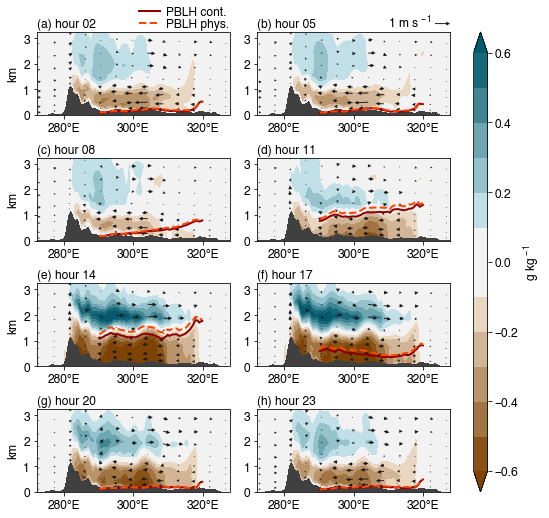

In [57]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.6,0.61,0.1)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               qvapor_diffs_array[t]*1000.,\
                               levels=levels,\
                               cmap=seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25),\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure3_qvapor_pblh_cross_sections.png', dpi=600, bbox_inches='tight')

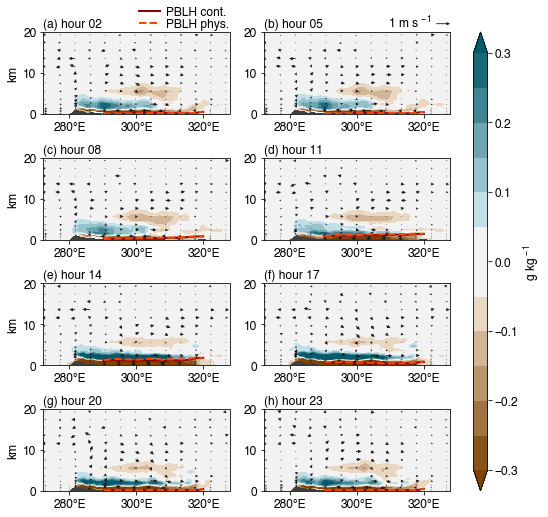

In [56]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.3,0.31,0.05)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,2)]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               qvapor_diffs_array[t]*1000.,\
                               levels=levels,\
                               cmap=seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25),\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,20)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure3_qvapor_pblh_cross_sections_upto20km.png', dpi=600, bbox_inches='tight')

# qcloud differences

# cldfra differences

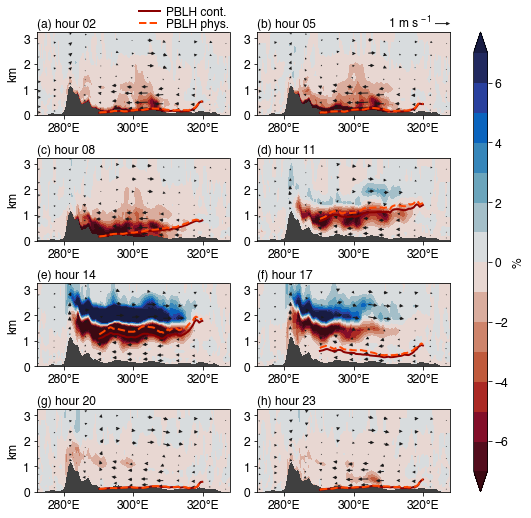

In [58]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-7,7.1,1)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               cldfra_diffs_array[t]*100.,\
                               levels=levels,\
                               cmap=cmocean.cm.balance_r,\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure4_cldfra_pblh_cross_sections.png', dpi=600, bbox_inches='tight')

# up to 10 km

# cldfra up to 20km

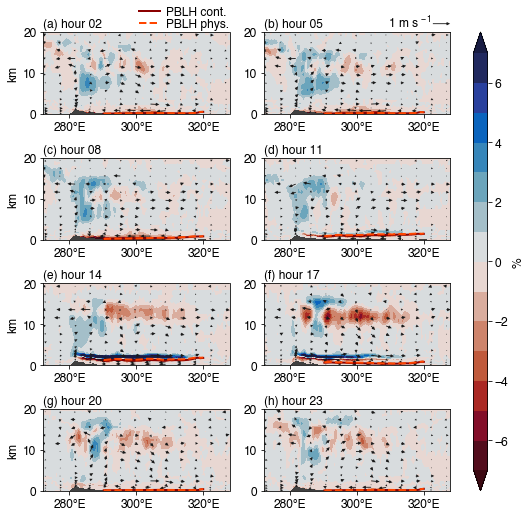

In [90]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-7,7.1,1)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,2)]
quiver_scale = .2 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               cldfra_diffs_array[t]*100.,\
                               levels=levels,\
                               cmap=cmocean.cm.balance_r,\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,20)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_cldfra_pblh_cross_sections_upto10km.png', dpi=600, bbox_inches='tight')

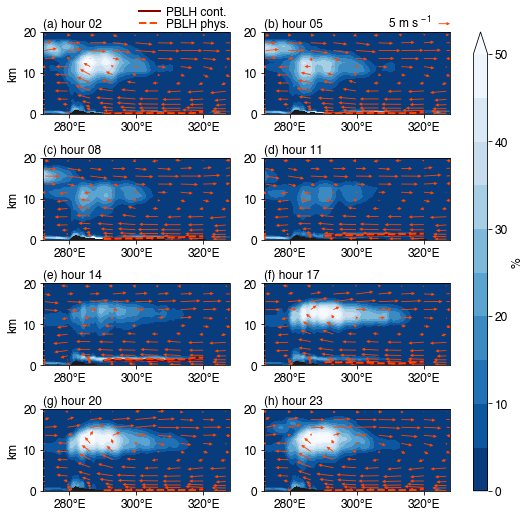

In [119]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(0,51,5)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=15
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,2)]
quiver_scale = 1.5 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 5
quiver_color = 'orangered'
quiver_head_width = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               cldfra_400_array[t]*100.,\
                               levels=levels,\
                               cmap='Blues_r',
                               extend='max')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_400_array[t][z_indices,::every_nth_lon],\
              wa_400_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,20)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_cldfra_CLIMATOLOGY_pblh_cross_sections_upto10km.png', dpi=600, bbox_inches='tight')


# first day

In [60]:
times_to_plot = [12,13,14,15,16,17,18,19]
times_to_plot_local = [8,9,10,11,12,13,14,15]

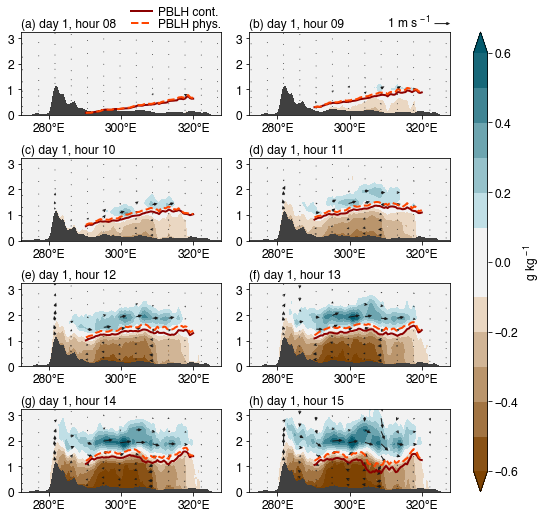

In [84]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.6,0.61,0.1)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25
quiver_shaft_width = .25
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

nrows=4;ncols=2
ax_list = []

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               qvapor_diffs_lat_mean[t,:,:]*1000.,\
                               levels=levels,\
                               cmap=seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25),\
                               extend='both')

    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    #ax.set_ylim(1013.25,700)
    ax.set_ylim(0,3.25)
    ax.set_yticks([0,1,2,3])
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([1000,900,800,700])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('hPa', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure7_qvapor_pblh_cross_sections_DAY1.png', dpi=600, bbox_inches='tight')

# qvapor 20km

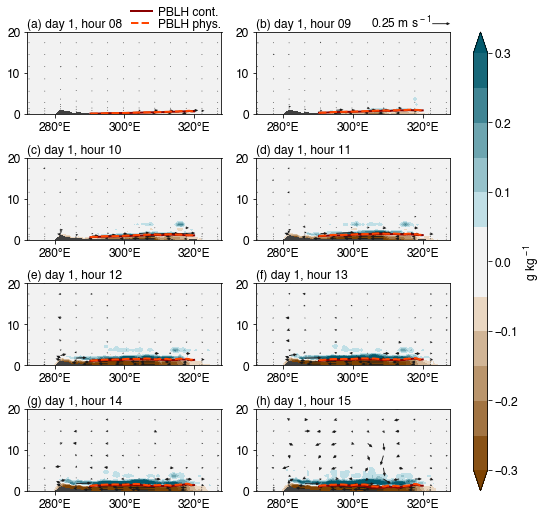

In [72]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.3,0.31,0.05)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,3)]
quiver_scale = 0.05
quiver_shaft_width = .25
quiver_key_scale = 0.25
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

nrows=4;ncols=2
ax_list = []

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               qvapor_diffs_lat_mean[t,:,:]*1000.,\
                               levels=levels,\
                               cmap=seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25),\
                               extend='both')

    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,z_indices,::every_nth_lon]*10.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    #ax.set_ylim(1013.25,700)
    ax.set_ylim(0,20)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([1000,900,800,700])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('hPa', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure5_qvapor_pblh_cross_sections_DAY1_upto20km.png', dpi=600, bbox_inches='tight')

# qcloud

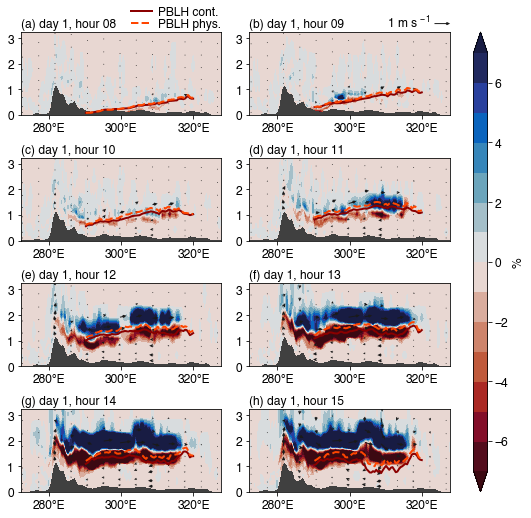

In [91]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-7,7.1,1)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25
quiver_shaft_width = .25
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

nrows=4;ncols=2
ax_list = []

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/10000.,\
                               cldfra_diffs_lat_mean[t,:,:]*100.,\
                               levels=levels,\
                               cmap=cmocean.cm.balance_r,\
                               extend='both')

    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    #ax.set_ylim(1013.25,700)
    ax.set_ylim(0,3.25)
    ax.set_yticks([0,1,2,3])
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([1000,900,800,700])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('hPa', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_cldfra_pblh_cross_sections_DAY1.png', dpi=600, bbox_inches='tight')

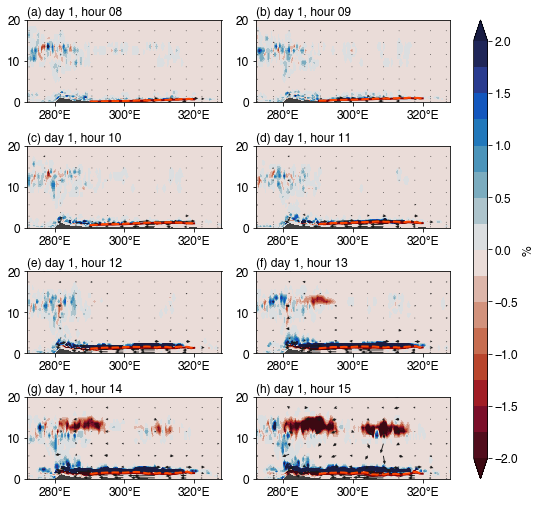

In [88]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-2,2.1,0.25)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,3)]
quiver_scale = .05
quiver_shaft_width = .25
quiver_key_scale = 0.5
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               cldfra_diffs_lat_mean[t,:,:]*100.,\
                               levels=levels,\
                               cmap=cmocean.cm.balance_r,\
                               extend='both')

    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,z_indices,::every_nth_lon]*10.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    #ax.set_ylim(1013.25,700)
    ax.set_ylim(0,20)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('hPa', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_cldfra_pblh_cross_sections_DAY1_upto20km.png', dpi=600, bbox_inches='tight')

In [57]:
#seaborn.choose_diverging_palette()
seaborn.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [58]:
seaborn.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[array([0.25199714, 0.49873371, 0.57516028, 1.        ]),
 array([0.43026136, 0.62000665, 0.67878019, 1.        ]),
 array([0.60852558, 0.74127959, 0.7824001 , 1.        ]),
 array([0.7867898 , 0.86255253, 0.88602001, 1.        ]),
 array([0.95, 0.95, 0.95, 1.  ]),
 array([0.95457726, 0.76653099, 0.78032569, 1.        ]),
 array([0.91971827, 0.58735877, 0.61174   , 1.        ]),
 array([0.88485928, 0.40818655, 0.44315432, 1.        ]),
 array([0.85104086, 0.23436275, 0.27960104, 1.        ])]

# temperature plot

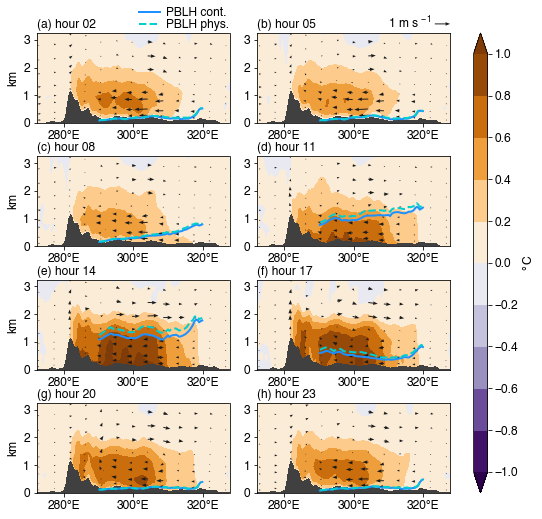

In [65]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.,1.1,0.2)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               tk_diffs_array[t],\
                               levels=levels,\
                               cmap='PuOr_r',\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='darkturquoise',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label(DEGREE_SIGN+'$\,$C', fontsize=fontsize)
cbar.set_ticks(levels)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure3supp_tk_pblh_cross_sections.png', dpi=600, bbox_inches='tight')

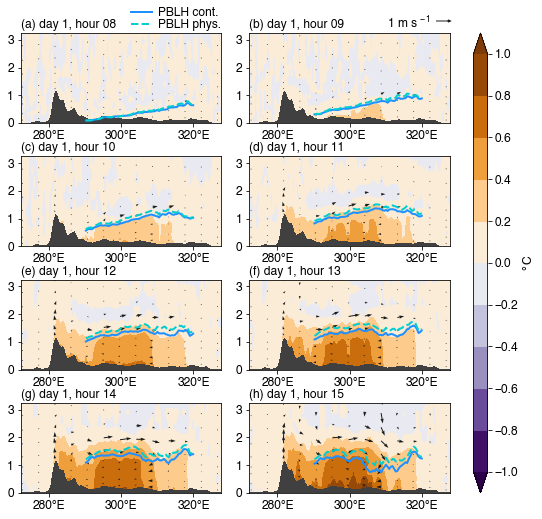

In [83]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.,1.1,0.2)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

nrows=4;ncols=2
ax_list = []

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               tk_diffs_lat_mean[t,:,:],\
                               levels=levels,\
                               cmap='PuOr_r',\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,:,:][z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,:,:][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='dodgerblue', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='darkturquoise',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label(DEGREE_SIGN+'$\,$C', fontsize=fontsize)
cbar.set_ticks(levels)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=.99, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure3supp_tk_pblh_cross_sections_DAY1.png', dpi=600, bbox_inches='tight')